In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from fdtd4d import FDTD
from boundaries import ABC

## Setup

In [2]:
fdtd = FDTD((50, 50, 1, 40))
fdtd.E_init[24:26, 24:26, 0, 20, 3] = 1
fdtd.add_BC(ABC(10, 10, 0, 5))

## Run

In [3]:
E, H = fdtd.run(50)

## Plot

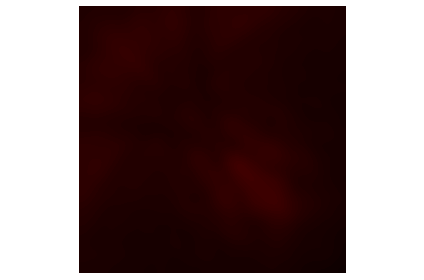

In [4]:
energy = np.sum(np.sum(E**2 + H**2, -1)**.5, 0)[10:-10, 10:-10]

plot = plt.imshow(energy[..., 5],
                  interpolation="bicubic",
                  cmap="hot",
                  vmin=0,
                  vmax=np.max(energy))
plt.axis("equal")
plt.gca().set_axis_off()
plt.tight_layout()

def animate(i):
    plot.set_array(energy[..., 5 + i])
HTML(FuncAnimation(plt.gcf(), animate, 30, interval=100).to_jshtml())
